In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [1]:
path_file= "glass.csv"

In [3]:
all_features= ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon','Trihalomethanes', 'Turbidity', 'Potability']

features_selected= all_features[0:5]+[all_features[-1]]

In [3]:
from sklearn.cluster import KMeans, DBSCAN


def create_dataset(path_file):
    df = pd.read_csv(path_file)
    return df

def rescaler(df):
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_scaled

def create_dataframe_features_selected(df:pd.DataFrame,columns:list):
    return df[columns]

def preprocessing(df):
    df_not_NaN=df.dropna()
    df_selected = create_dataframe_features_selected(df_not_NaN,all_features)
    df_rescaled=rescaler(df_selected)
    return df_rescaled

def preprocessing2(df):
    # 1. Normalizza i dati per evitare problemi con le scale
    # 2. Applica DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan.fit(df)
    # 3. Ottieni le etichette (-1 indica outlier)
    labels = dbscan.labels_
    # 4. Filtra i dati: rimuovi gli outlier (label -1)
    df_clean = df[labels != -1]
    return df_clean

def visualize_dataset(df):
    print(df.shape)
    print(df.head())


In [4]:
df_water=create_dataset(path_file)
df_water.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Visualizziamo il Dataset per coppie di features

KeyboardInterrupt: 

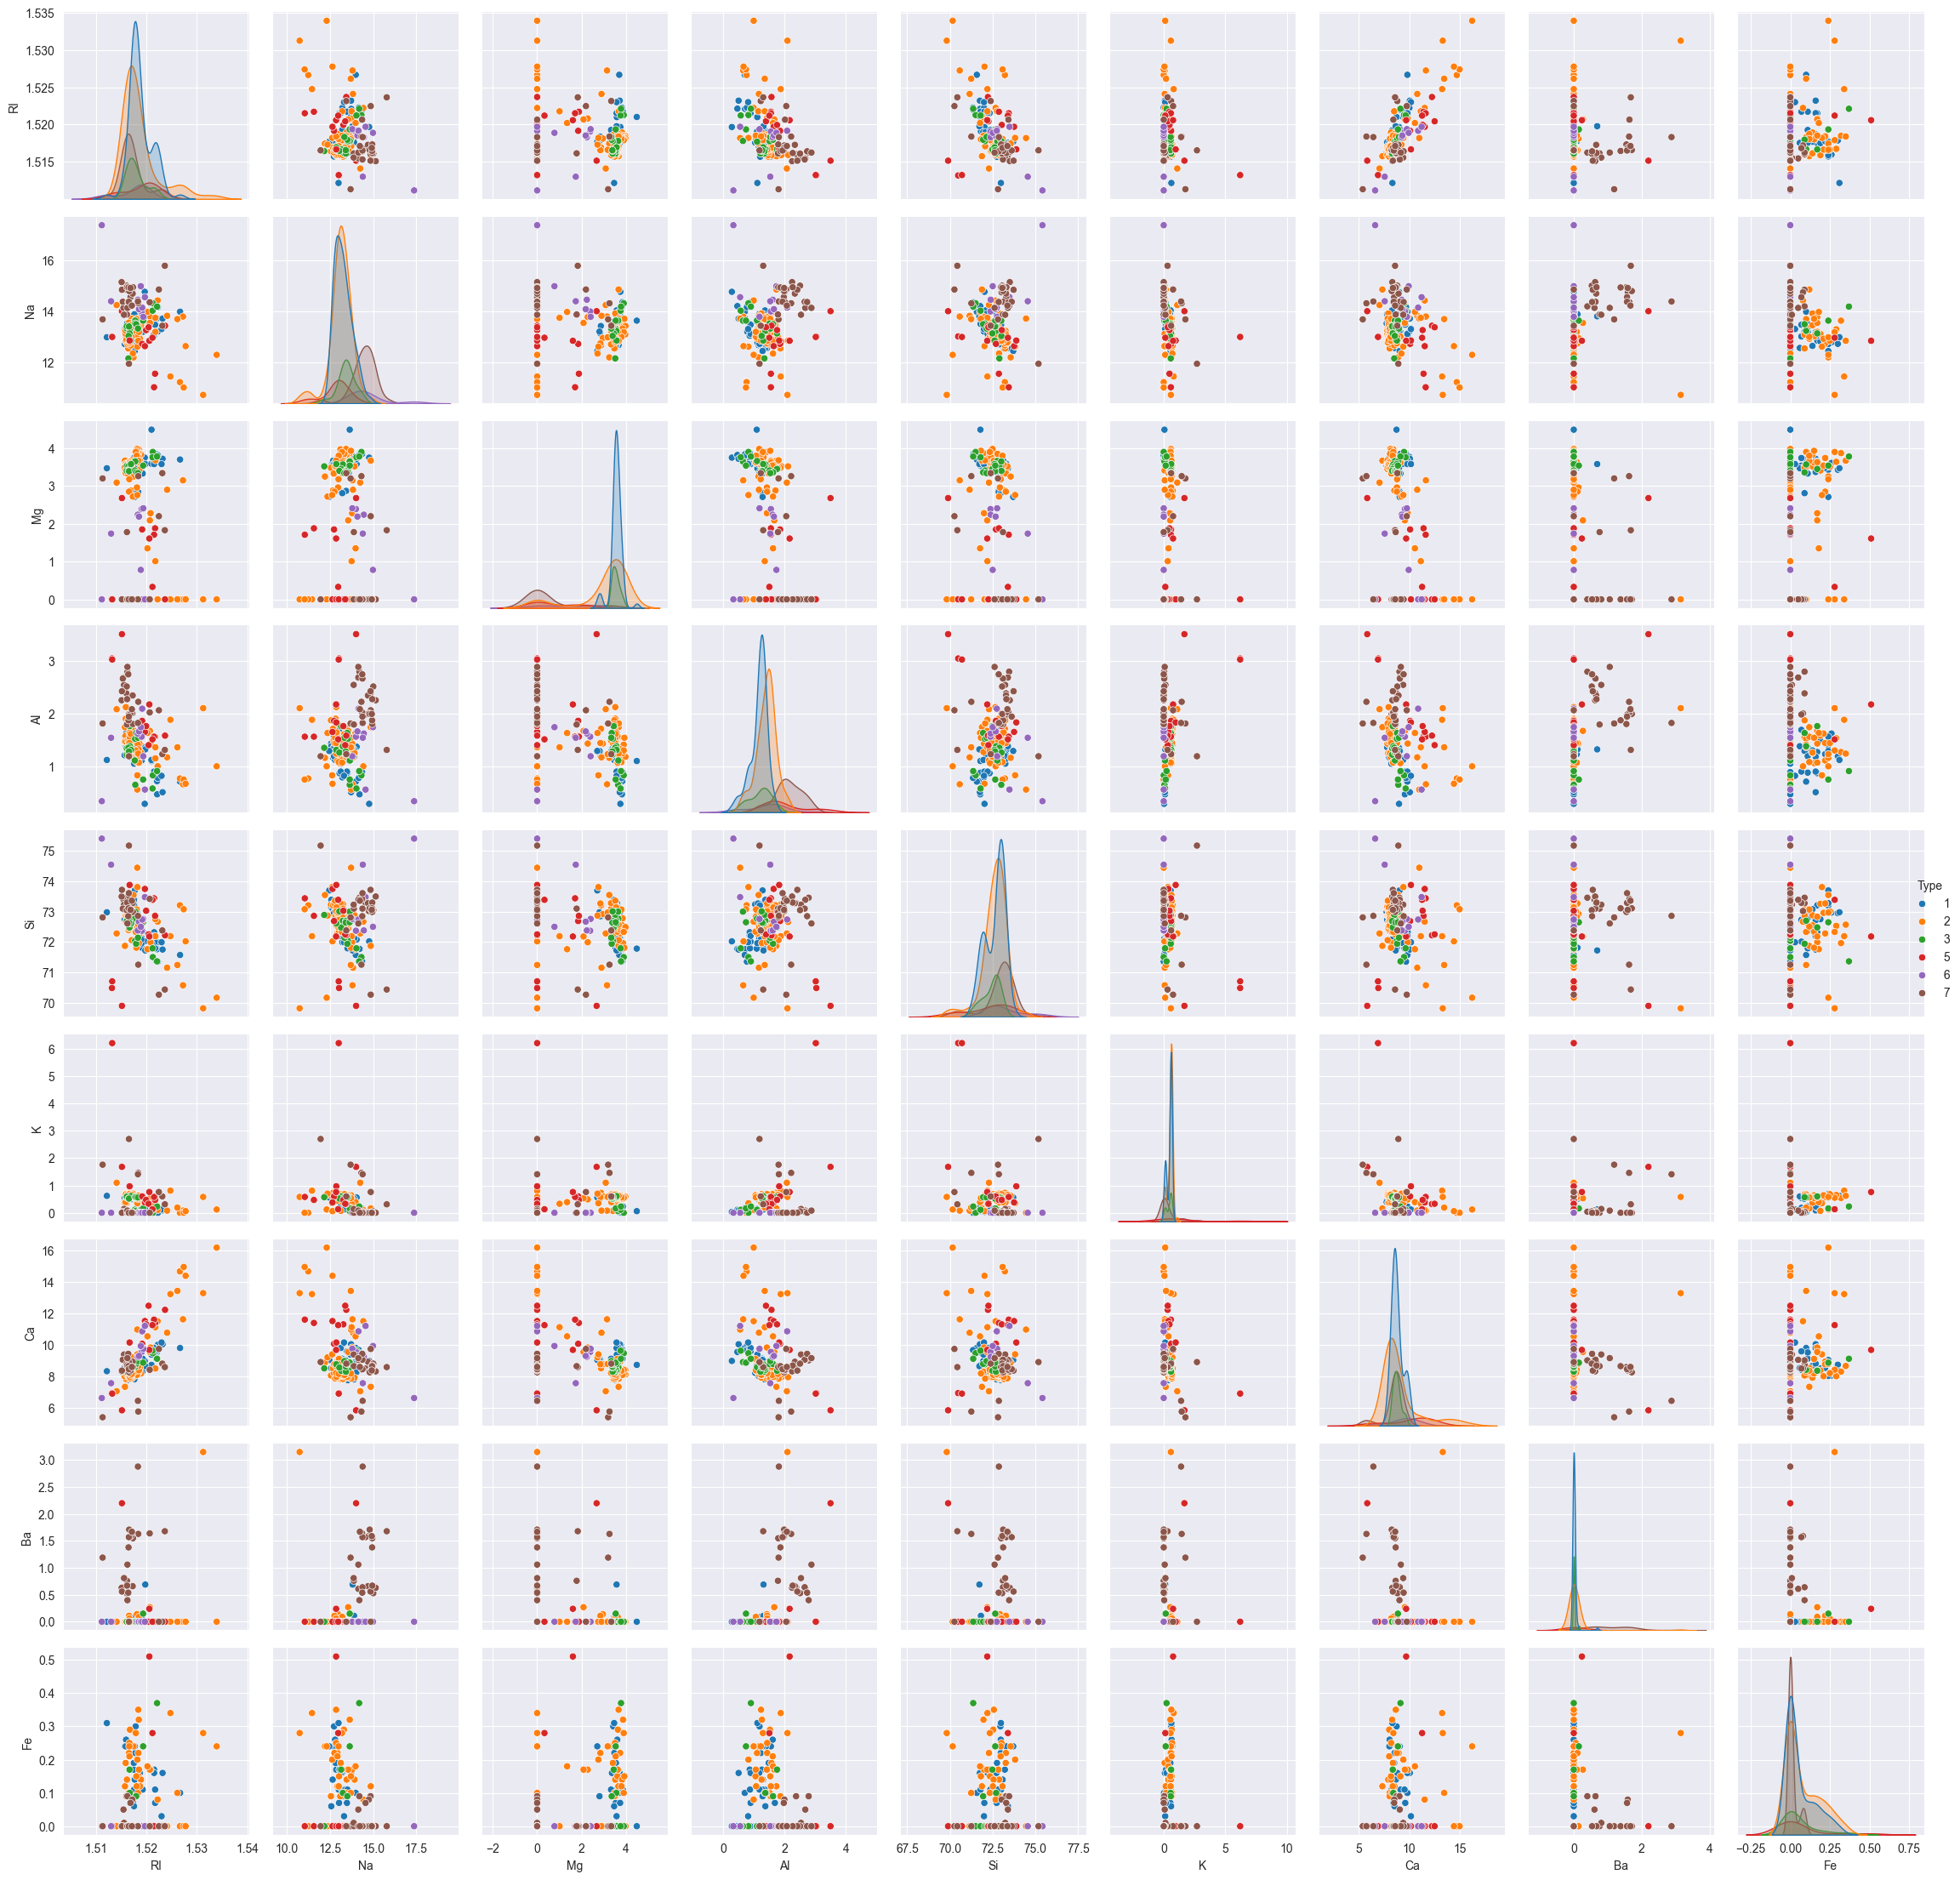

In [5]:
sns.pairplot(df_water, hue="Type", palette="tab10")

In [6]:
X = df_water.drop('Type', axis=1)  # Tutte le colonne tranne 'acquisto'
y = df_water['Type']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train (f,l): {len(X_train)}, {len(y_train)}")
print(f"Test (f,l): {len(X_test)}, {len(y_test)}")

Train (f,l): 171, 171
Test (f,l): 43, 43


# Classificatore Classico

In [8]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

# Valutiamo il classificatore

In [9]:
from sklearn.metrics import accuracy_score

y_pred=dtc.predict(X_test)
print(f"test accuracy: {accuracy_score(y_test,y_pred)}")

test accuracy: 0.7209302325581395
